<a href="https://colab.research.google.com/github/mabittar/FinancialData/blob/master/YFinance_Stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=e8f3ee1625901aefc4ce64ded49ffb049feb8c912a5d14a68da3a09712e88a66
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import pandas as pd
import yfinance as yf

In [0]:
tickers = ["F", "MSFT", "FB", "NFLX", "GOOG", "BLDP", "TSLA"]

In [0]:
manystocks = yf.download(tickers, start = "2016-01-01", end = "2020-04-03", period = "1d")

[*********************100%***********************]  7 of 7 completed


In [0]:
manystocks.head()

Adj Close                         ...    Volume                   
                BLDP          F          FB  ...      MSFT      NFLX     TSLA
Date                                         ...                             
2016-01-04      1.52  10.838892  102.220001  ...  53778000  20794800  6827100
2016-01-05      1.46  10.644922  102.730003  ...  34079700  17664600  3186800
2016-01-06      1.39  10.171642  102.970001  ...  39518900  33045700  3779100
2016-01-07      1.31   9.853537   97.919998  ...  56564900  33636700  3554300
2016-01-08      1.33   9.729398   97.330002  ...  48754000  18067100  3628100

[5 rows x 42 columns]

In [0]:
#or group data by the name of the tickers
manystocks_groupby = yf.download(tickers, start = "2016-01-01", end = "2020-04-03", period = "1d", group_by= "Ticker")
manystocks_groupby.head()

[*********************100%***********************]  7 of 7 completed


NFLX                          ...  BLDP                  
                  Open        High         Low  ... Close Adj Close  Volume
Date                                            ...                        
2016-01-04  109.000000  110.000000  105.209999  ...  1.52      1.52  724200
2016-01-05  110.449997  110.580002  105.849998  ...  1.46      1.46  297300
2016-01-06  105.290001  117.910004  104.959999  ...  1.39      1.39  668600
2016-01-07  116.360001  122.180000  112.290001  ...  1.31      1.31  616700
2016-01-08  116.330002  117.720001  111.099998  ...  1.33      1.33  743600

[5 rows x 42 columns]

In [0]:
many_stocks_daily_returns = manystocks['Adj Close'].pct_change()
many_stocks_daily_returns

,BLDP,F,FB,GOOG,MSFT,NFLX,TSLA
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.039474,-0.017896,0.004989,0.000998,0.004562,-0.020917,0.000089
2016-01-06,-0.047945,-0.044461,0.002336,0.001400,-0.018165,0.093071,-0.019648
2016-01-07,-0.057554,-0.031274,-0.049043,-0.023170,-0.034783,-0.026513,-0.015477
2016-01-08,0.015267,-0.012598,-0.006025,-0.016410,0.003067,-0.027671,-0.021563
...,...,...,...,...,...,...,...
2020-03-27,-0.063260,-0.011429,-0.040100,-0.043934,-0.041061,-0.016171,-0.026128
2020-03-30,-0.016883,-0.030828,0.058422,0.032511,0.070341,0.038754,-0.023777
2020-03-31,0.005284,-0.039761,0.005122,0.013943,-0.015727,0.012239,0.043554


In [0]:
#get only close data
stocksclose = yf.download(tickers, start = "2016-01-01", end = "2020-04-03", period = "1d").Close
many_stocks_daily_returns = manystocks['Adj Close'].pct_change()
many_stocks_daily_returns 


[*********************100%***********************]  7 of 7 completed


,BLDP,F,FB,GOOG,MSFT,NFLX,TSLA
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.039474,-0.017896,0.004989,0.000998,0.004562,-0.020917,0.000089
2016-01-06,-0.047945,-0.044461,0.002336,0.001400,-0.018165,0.093071,-0.019648
2016-01-07,-0.057554,-0.031274,-0.049043,-0.023170,-0.034783,-0.026513,-0.015477
2016-01-08,0.015267,-0.012598,-0.006025,-0.016410,0.003067,-0.027671,-0.021563
...,...,...,...,...,...,...,...
2020-03-27,-0.063260,-0.011429,-0.040100,-0.043934,-0.041061,-0.016171,-0.026128
2020-03-30,-0.016883,-0.030828,0.058422,0.032511,0.070341,0.038754,-0.023777
2020-03-31,0.005284,-0.039761,0.005122,0.013943,-0.015727,0.012239,0.043554


In [0]:
#drop NA values
many_stocks_daily_returns.dropna(subset=["F"], axis=0, inplace = True) #axis=0 drop row; axis=1 drop collumn
many_stocks_daily_returns

,BLDP,F,FB,GOOG,MSFT,NFLX,TSLA
Date,,,,,,,
2016-01-05,-0.039474,-0.017896,0.004989,0.000998,0.004562,-0.020917,0.000089
2016-01-06,-0.047945,-0.044461,0.002336,0.001400,-0.018165,0.093071,-0.019648
2016-01-07,-0.057554,-0.031274,-0.049043,-0.023170,-0.034783,-0.026513,-0.015477
2016-01-08,0.015267,-0.012598,-0.006025,-0.016410,0.003067,-0.027671,-0.021563
2016-01-11,-0.007519,0.018341,0.001849,0.002184,-0.000573,0.032139,-0.014929
...,...,...,...,...,...,...,...
2020-03-27,-0.063260,-0.011429,-0.040100,-0.043934,-0.041061,-0.016171,-0.026128
2020-03-30,-0.016883,-0.030828,0.058422,0.032511,0.070341,0.038754,-0.023777
2020-03-31,0.005284,-0.039761,0.005122,0.013943,-0.015727,0.012239,0.043554


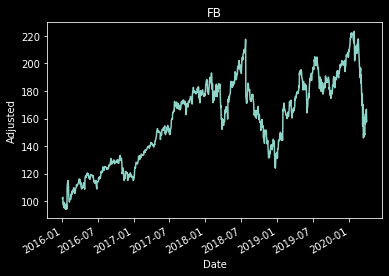

In [0]:
stocksclose.dropna(subset=["F"], axis=0, inplace = True) #axis=0 drop row; axis=1 drop collumn
import matplotlib.pyplot as plt
stocksclose['GOOG'].plot()
plt.xlabel("Date")
plt.ylabel("Adjusted")
plt.title("GOOG")
plt.style.use('dark_background')
plt.show()

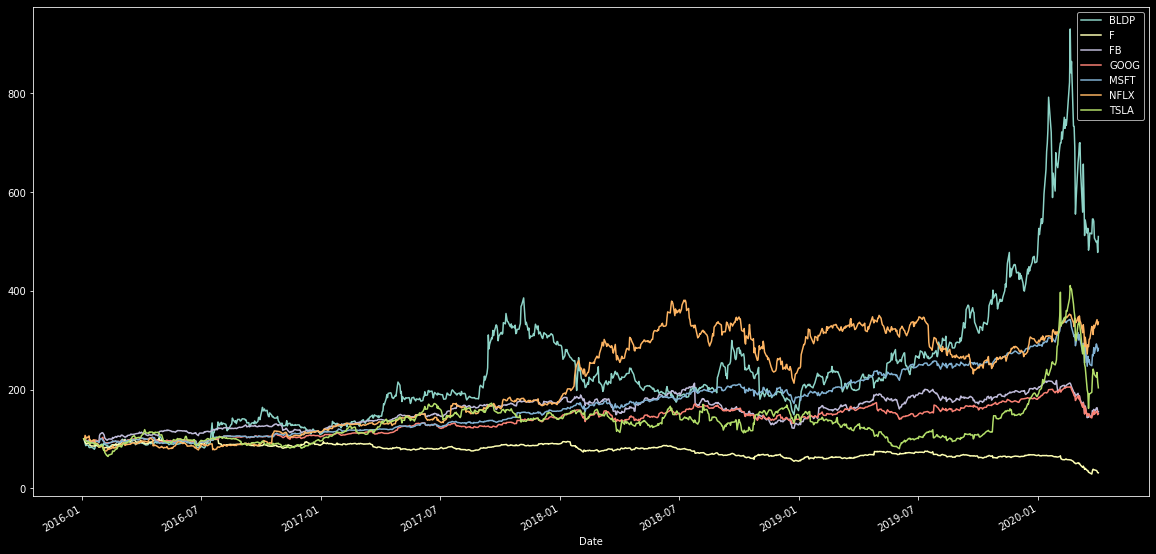

In [0]:
(stocksclose / stocksclose.iloc[0] * 100).plot(figsize = (20, 10))